In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistical Analysis: Demographic Factors (from dataset1.csv)

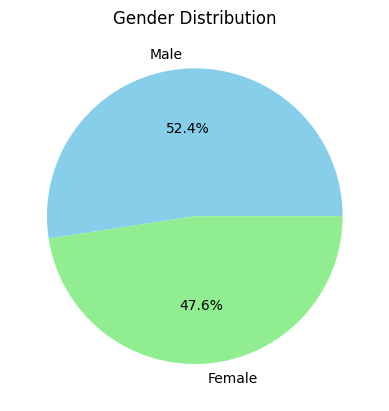

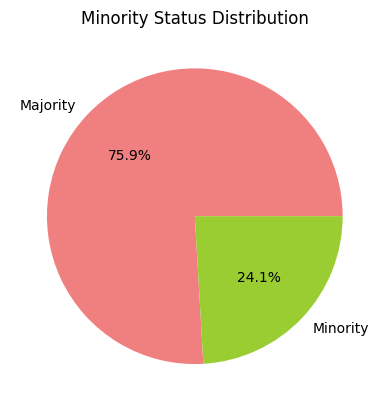

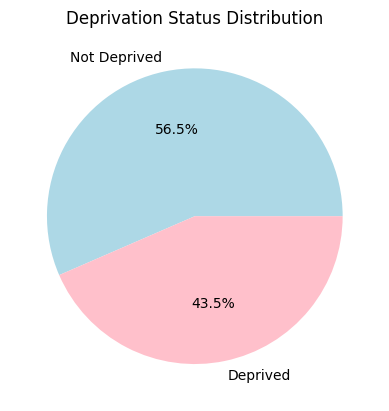

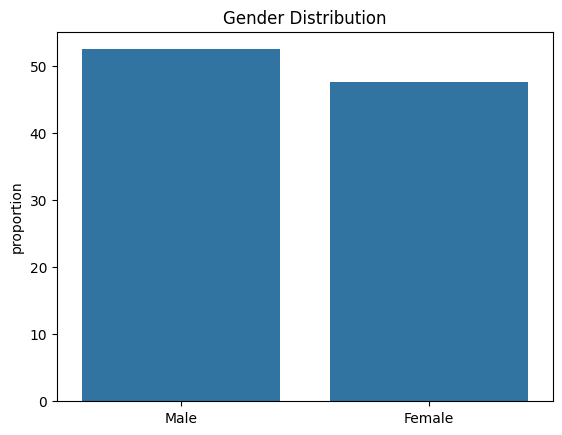

In [2]:
dataset1 = pd.read_csv('dataset1.csv')

# Gender distribution
gender_counts = dataset1['gender'].value_counts(normalize=True) * 100
gender_labels = ['Male', 'Female']
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

# Minority distribution
minority_counts = dataset1['minority'].value_counts(normalize=True) * 100
minority_labels = ['Majority', 'Minority']
plt.pie(minority_counts, labels=minority_labels, autopct='%1.1f%%', colors=['lightcoral', 'yellowgreen'])
plt.title('Minority Status Distribution')
plt.show()

# Deprivation status
deprivation_counts = dataset1['deprived'].value_counts(normalize=True) * 100
deprivation_labels = ['Not Deprived', 'Deprived']
plt.pie(deprivation_counts, labels=deprivation_labels, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Deprivation Status Distribution')
plt.show()

# Insights can also be displayed with bar charts for a clearer view
sns.barplot(x=gender_labels, y=gender_counts)
plt.title('Gender Distribution')
plt.show()

## Descriptive Statistical Analysis: Screen Time Patterns (from dataset2.csv)

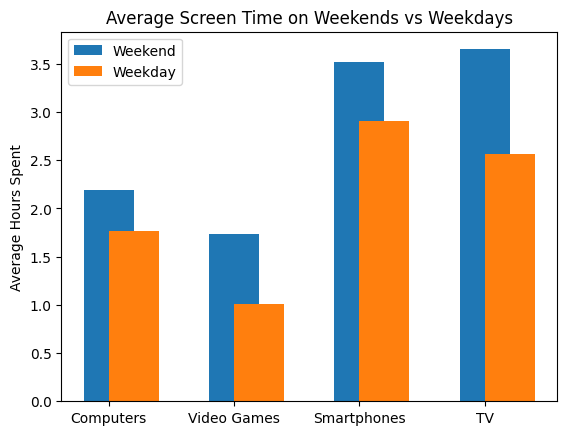

                C_we           C_wk           G_we           G_wk  \
count  113359.000000  113359.000000  113359.000000  113359.000000   
mean        2.188887       1.768854       1.739130       1.013082   
std         2.077960       1.734970       2.168335       1.554592   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.500000       0.500000       0.000000       0.000000   
50%         2.000000       1.000000       0.500000       0.000000   
75%         3.000000       3.000000       3.000000       2.000000   
max         7.000000       7.000000       7.000000       7.000000   

                S_we           S_wk           T_we           T_wk  
count  113359.000000  113359.000000  113359.000000  113359.000000  
mean        3.517004       2.910656       3.650932       2.567688  
std         2.497139       2.339170       1.954105       1.696659  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.000000       1.000000   

In [3]:
dataset2 = pd.read_csv('dataset2.csv')

# Calculate mean screen time on weekends and weekdays for different devices
screen_time_means = dataset2[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].mean()

# Screen time on weekends vs weekdays
weekend_time = dataset2[['C_we', 'G_we', 'S_we', 'T_we']].mean().sum()
weekday_time = dataset2[['C_wk', 'G_wk', 'S_wk', 'T_wk']].mean().sum()

# Visualizing the results
labels = ['Computers', 'Video Games', 'Smartphones', 'TV']
weekend = [screen_time_means['C_we'], screen_time_means['G_we'], screen_time_means['S_we'], screen_time_means['T_we']]
weekday = [screen_time_means['C_wk'], screen_time_means['G_wk'], screen_time_means['S_wk'], screen_time_means['T_wk']]

x = range(len(labels))
plt.bar(x, weekend, width=0.4, label='Weekend', align='center')
plt.bar(x, weekday, width=0.4, label='Weekday', align='edge')
plt.xticks(x, labels)
plt.ylabel('Average Hours Spent')
plt.title('Average Screen Time on Weekends vs Weekdays')
plt.legend()
plt.show()

# Mean, median, and standard deviation for screen time
screen_time_stats = dataset2[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].describe()
print(screen_time_stats)

## Inferential Statistical Analysis: Impact of Deprivation on Well-Being (from dataset1.csv and dataset3.csv)

In [4]:
from scipy import stats

# Load datasets
dataset1 = pd.read_csv('dataset1.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Merge dataset1 and dataset3 on 'ID'
merged_data = pd.merge(dataset1, dataset3, on='ID')

# Split the data into deprived and non-deprived groups
deprived_group = merged_data[merged_data['deprived'] == 1]
non_deprived_group = merged_data[merged_data['deprived'] == 0]

# Well-being variables to test
well_being_columns = ['Optm', 'Usef', 'Relx', 'Cheer']

# Perform t-tests for each well-being variable
for col in well_being_columns:
    t_stat, p_val = stats.ttest_ind(deprived_group[col], non_deprived_group[col], nan_policy='omit')
    print(f'{col}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}')


Optm: t-statistic = -2.4345, p-value = 0.0149
Usef: t-statistic = -4.2629, p-value = 0.0000
Relx: t-statistic = 0.7520, p-value = 0.4520
Cheer: t-statistic = -9.7973, p-value = 0.0000


## Inferential Statistical Analysis: Association Between Screen Time and Well-Being (from dataset2.csv and dataset3.csv)

                   Total_Screen_Time      Optm      Usef      Relx     Cheer
Total_Screen_Time           1.000000 -0.078420 -0.113839 -0.030974 -0.101836
Optm                       -0.078420  1.000000  0.458577  0.249537  0.377359
Usef                       -0.113839  0.458577  1.000000  0.392481  0.481538
Relx                       -0.030974  0.249537  0.392481  1.000000  0.522821
Cheer                      -0.101836  0.377359  0.481538  0.522821  1.000000


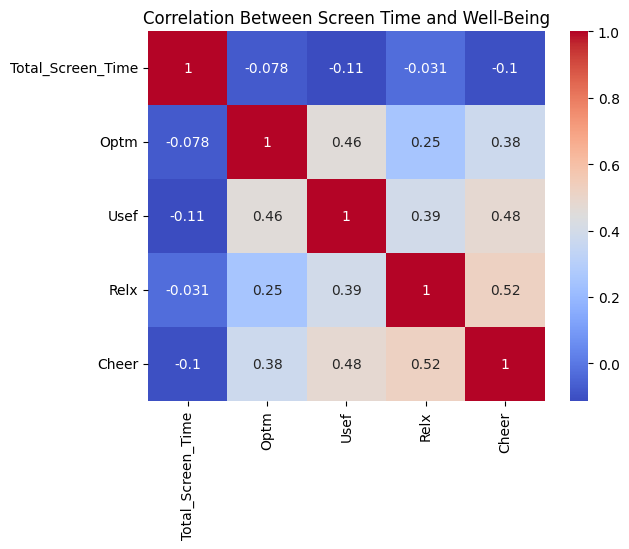

In [5]:
# Merge dataset2 and dataset3 on 'ID' 
merged_data_screen_wellbeing = pd.merge(dataset2, dataset3, on='ID')

# Create a 'Total Screen Time' column (sum of all device usages on both  weekends and weekdays)
merged_data_screen_wellbeing['Total_Screen_Time'] = merged_data_screen_wellbeing[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

# Correlation analysis between total screen time and well-being indicators
well_being_columns = ['Optm', 'Usef', 'Relx', 'Cheer']
correlations = merged_data_screen_wellbeing[['Total_Screen_Time'] + well_being_columns].corr()

print(correlations)

# Visualize correlation matrix using heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Screen Time and Well-Being')
plt.show()
